<font face="verdana"> 

# Exploratory Data Analysis
<br>
<br>

In this section we are going to:

<br>Understand dataset
<br>clean/impute missing values
<br>Dive into each attribute
<br>Record observations and create a clean data for model building



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
import seaborn as sns
import time
import copy
from datetime import datetime
from time import strftime


from pylab import rcParams
#import hdbscan

from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

#from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn import metrics
from sklearn import metrics as mt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.cluster import KMeans

from tabulate import tabulate

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from __future__ import print_function

C:\Users\Preeti\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Users\Preeti\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('LoanStats3a_Oct_16.csv')
df.columns

FileNotFoundError: File b'LoanStats3a_Oct_16.csv' does not exist

<font face="verdana"> 
  
  ### Understanding dataset
  <br>
  We will look at sample records, number of records, number of columns, if there are any duplicate records, identify categorical variables, identify numeric variables, range of values for numeric variables
    

In [3]:
df.head(10)

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,...,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,2500,60 months,Less than 1 year,RENT,30000.0,Source Verified,43445,Charged Off,car,GA,...,36251.0,5.0,NaN,NaN,3.0,0.0,1687,0.094,4.0,0.0
1,5600,60 months,4 years,OWN,40000.0,Source Verified,43445,Charged Off,small_business,CA,...,43194.0,2.0,NaN,NaN,11.0,0.0,5210,0.326,13.0,0.0
2,5375,60 months,Less than 1 year,RENT,15000.0,Verified,43445,Charged Off,other,TX,...,43347.0,0.0,NaN,NaN,2.0,0.0,9279,0.365,3.0,0.0
3,9000,36 months,Less than 1 year,RENT,30000.0,Source Verified,43445,Charged Off,debt_consolidation,VA,...,43194.0,1.0,NaN,NaN,4.0,0.0,10452,0.917,9.0,0.0
4,10000,36 months,3 years,RENT,100000.0,Source Verified,43445,Charged Off,other,CA,...,33359.0,2.0,NaN,NaN,14.0,0.0,11997,0.555,29.0,0.0
5,21000,36 months,10+ years,RENT,105000.0,Verified,43445,Charged Off,debt_consolidation,FL,...,30348.0,0.0,NaN,NaN,7.0,0.0,32135,0.903,38.0,0.0
6,6000,36 months,1 year,RENT,76000.0,Not Verified,43445,Charged Off,major_purchase,CA,...,43252.0,1.0,NaN,NaN,7.0,0.0,5963,0.297,7.0,0.0
7,15000,36 months,9 years,RENT,60000.0,Not Verified,43445,Charged Off,debt_consolidation,NY,...,43376.0,1.0,NaN,NaN,7.0,0.0,5872,0.576,11.0,0.0
8,5000,60 months,2 years,RENT,50004.0,Not Verified,43445,Charged Off,other,PA,...,43376.0,0.0,20.0,NaN,14.0,0.0,4345,0.595,22.0,0.0
9,5000,36 months,10+ years,MORTGAGE,100000.0,Source Verified,43445,Charged Off,debt_consolidation,OH,...,34851.0,0.0,NaN,NaN,17.0,0.0,74351,0.621,35.0,0.0


In [5]:
print("\n ********************************** Summary of dataset *******************************************************")
print("\n1. Total number of records: ",df.shape[0])
print("\n2. Total number of columns: ",df.shape[1])
print("\n3. Column Names : ",df.columns)
print("\n4. Are there any duplicate records?", df.duplicated().any())
print("\n******* Numerical attributes and their range *******")
df.describe().T


 ********************************** Summary of dataset *******************************************************

1. Total number of records:  778918

2. Total number of columns:  22

3. Column Names :  Index(['loan_amnt', 'term', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

4. Are there any duplicate records? False

******* Numerical attributes and their range *******


,count,mean,std,min,25%,50%,75%,max
loan_amnt,778918.0,14307.298875,8357.990602,500.0,8000.000,12000.000,20000.000,35000.000
annual_inc,778914.0,74287.668937,62495.712310,0.0,45000.000,63350.000,90000.000,8900060.000
issue_d,778918.0,43290.340493,102.026289,43108.0,43205.000,43295.000,43387.000,43449.000
dti,778916.0,17.877727,8.284355,0.0,11.710,17.400,23.630,672.520
delinq_2yrs,778889.0,0.307518,0.851628,0.0,0.000,0.000,0.000,39.000
earliest_cr_line,778889.0,37952.540781,4765.811597,16072.0,34547.000,36404.000,43230.000,43445.000
inq_last_6mths,778889.0,0.719900,1.018117,0.0,0.000,0.000,1.000,33.000
mths_since_last_delinq,377832.0,34.266515,21.894204,0.0,16.000,31.000,50.000,188.000
mths_since_last_record,121635.0,70.652937,28.293563,0.0,51.000,70.000,93.000,129.000
open_acc,778889.0,11.463246,5.265339,0.0,8.000,11.000,14.000,90.000


<br>
<br>
<br>
<font face="verdana"> 
Let us look at sample of each column in the dataset, Look at missing values in each columns and make our observations

In [6]:
col_names = df.columns
for col in col_names:
    print("Column Name: ",col)
    df[col].head()

Column Name:  loan_amnt


0     2500
1     5600
2     5375
3     9000
4    10000
Name: loan_amnt, dtype: int64

Column Name:  term


0     60 months
1     60 months
2     60 months
3     36 months
4     36 months
Name: term, dtype: object

Column Name:  emp_length


0    Less than 1 year
1             4 years
2    Less than 1 year
3    Less than 1 year
4             3 years
Name: emp_length, dtype: object

Column Name:  home_ownership


0    RENT
1     OWN
2    RENT
3    RENT
4    RENT
Name: home_ownership, dtype: object

Column Name:  annual_inc


0     30000.0
1     40000.0
2     15000.0
3     30000.0
4    100000.0
Name: annual_inc, dtype: float64

Column Name:  verification_status


0    Source Verified
1    Source Verified
2           Verified
3    Source Verified
4    Source Verified
Name: verification_status, dtype: object

Column Name:  issue_d


0    43445
1    43445
2    43445
3    43445
4    43445
Name: issue_d, dtype: int64

Column Name:  loan_status


0    Charged Off
1    Charged Off
2    Charged Off
3    Charged Off
4    Charged Off
Name: loan_status, dtype: object

Column Name:  purpose


0                   car
1        small_business
2                 other
3    debt_consolidation
4                 other
Name: purpose, dtype: object

Column Name:  addr_state


0    GA
1    CA
2    TX
3    VA
4    CA
Name: addr_state, dtype: object

Column Name:  dti


0     1.00
1     5.55
2    18.08
3    10.08
4     7.06
Name: dti, dtype: float64

Column Name:  delinq_2yrs


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: delinq_2yrs, dtype: float64

Column Name:  earliest_cr_line


0    36251.0
1    43194.0
2    43347.0
3    43194.0
4    33359.0
Name: earliest_cr_line, dtype: float64

Column Name:  inq_last_6mths


0    5.0
1    2.0
2    0.0
3    1.0
4    2.0
Name: inq_last_6mths, dtype: float64

Column Name:  mths_since_last_delinq


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: mths_since_last_delinq, dtype: float64

Column Name:  mths_since_last_record


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: mths_since_last_record, dtype: float64

Column Name:  open_acc


0     3.0
1    11.0
2     2.0
3     4.0
4    14.0
Name: open_acc, dtype: float64

Column Name:  pub_rec


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pub_rec, dtype: float64

Column Name:  revol_bal


0     1687
1     5210
2     9279
3    10452
4    11997
Name: revol_bal, dtype: int64

Column Name:  revol_util


0    0.094
1    0.326
2    0.365
3    0.917
4    0.555
Name: revol_util, dtype: float64

Column Name:  total_acc


0     4.0
1    13.0
2     3.0
3     9.0
4    29.0
Name: total_acc, dtype: float64

Column Name:  pub_rec_bankruptcies


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [8]:
for col in df.columns:
    print("#Missing values in ",col,": ",df[col].isnull().sum())

#Missing values in  loan_amnt :  0
#Missing values in  term :  0
#Missing values in  emp_length :  0
#Missing values in  home_ownership :  0
#Missing values in  annual_inc :  4
#Missing values in  verification_status :  0
#Missing values in  issue_d :  0
#Missing values in  loan_status :  0
#Missing values in  purpose :  0
#Missing values in  addr_state :  0
#Missing values in  dti :  2
#Missing values in  delinq_2yrs :  29
#Missing values in  earliest_cr_line :  29
#Missing values in  inq_last_6mths :  29
#Missing values in  mths_since_last_delinq :  401086
#Missing values in  mths_since_last_record :  657283
#Missing values in  open_acc :  29
#Missing values in  pub_rec :  29
#Missing values in  revol_bal :  0
#Missing values in  revol_util :  459
#Missing values in  total_acc :  29
#Missing values in  pub_rec_bankruptcies :  1365


<font face="verdana"> 
  
  ### Observations and next steps:

<br>1. Column <b>Term</b> is categorical because of the usuage "month". It would be good to convert it to numeric as values 36, 60 have different weightage.
<br>2. <b>emp_length</b> impute 'n/a' to '0 year'. 
<br>3. <b>mths_since_last_delinq</b> has missing values. These are never delinquent records, we can mark NANs to 0.
<br>4. <b>mths_since_last_record</b> has too many missing values. We will mark NANs to 0 and observe the data.
<br>5. <b>revol_util</b> has %. This needs to be removed and column has to be converted to numeric.
<br>6. <b>issue_d</b> does not provide year of issue. This column would be incorrect to use. We can drop the column.
<br>7. <b>earliest_cr_line</b> moves inconsistently form mm-yy to dd-mm values. We will look at more records and decide to delete.
<br>8. <b>dti</b> is missing 2 values. We can impute mean values.
<br>9. <b>delinq_2yrs,pub_rec_bankruptcies,open_acc,pub_rec,total_acc,inq_last_6mths</b> We will mark NANs to 0.
<br>10.<b>revol_util</b> these are missing values. We will impute mean values.
<br>11.<b>annual_inc</b> these are missing values. We will impute mean values.
<br>Note: All numeric values after imputing will have to recasted to type numeric.


The above observations are going to be executed step-by-step to complete data cleaning.

In [9]:
#1.  Loan term has been converted to numeric and stored in the different attribute n_term
df['term'] = df['term'].str.strip()
df['term'].unique()
df['n_term'] = np.where(df['term']=='36 months', 36, 60)
df['n_term'].unique()

array(['60 months', '36 months'], dtype=object)

array([60, 36], dtype=int64)

In [10]:
# 2. <b>emp_length</b> impute 'n/a' to '0 year'. 
df['emp_length'].replace('n/a','0 years',inplace=True)
df['emp_length'].unique()

array(['Less than 1 year', '4 years', '3 years', '10+ years', '1 year',
       '9 years', '2 years', '8 years', '7 years', '5 years', '0 years',
       '6 years'], dtype=object)

In [11]:
#3.  fill up missing values for mths_since_last_delinq with 0
df['mths_since_last_delinq'].fillna(0, inplace=True)
df['mths_since_last_delinq'].head(10)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8    20.0
9     0.0
Name: mths_since_last_delinq, dtype: float64

In [12]:
#4. <b>mths_since_last_record</b> has too many missing values. We will mark NANs to 0 and observe the data.
df['mths_since_last_record'].fillna(0, inplace=True)
df['mths_since_last_record'].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: mths_since_last_record, dtype: float64

In [13]:
# 5.revol_util has %. This needs to be removed and column has to be converted to numeric.
#10.revol_util these are missing values. We will impute mean values.
#df['revol_util'] = df['revol_util'].str.replace('%','')
# fill missing value with mean values
df['revol_util'].fillna(value=df['revol_util'].mean(),inplace=True)
df['revol_util'] = df['revol_util'].astype(float)
df['revol_util'].isnull().any()

False

In [14]:
#<br>8. <b>dti</b> is missing 2 values. We can impute mean values.
df['dti'].fillna(value=df['dti'].mean(),inplace=True)
df['dti'].isnull().any()

False

In [15]:
# 7. <b>earliest_cr_line</b> moves inconsistently form mm-yy to dd-mm values. We will look at more records and decide to delete.
df['earliest_cr_line'].head(20)
df['earliest_cr_line'].tail(20)

0     36251.0
1     43194.0
2     43347.0
3     43194.0
4     33359.0
5     30348.0
6     43252.0
7     43376.0
8     43376.0
9     34851.0
10    33695.0
11    43379.0
12    36039.0
13    35551.0
14    34790.0
15    36526.0
16    34669.0
17    43345.0
18    35916.0
19    43438.0
Name: earliest_cr_line, dtype: float64

778898    43314.0
778899    35855.0
778900    43283.0
778901    43252.0
778902    34121.0
778903    43223.0
778904    43346.0
778905    34608.0
778906    36586.0
778907    43379.0
778908    34455.0
778909    43142.0
778910    43410.0
778911    27699.0
778912    43345.0
778913    34547.0
778914    36342.0
778915    43347.0
778916    27089.0
778917    43435.0
Name: earliest_cr_line, dtype: float64

In [16]:
df['annual_inc'].fillna(value=df['annual_inc'].mean(),inplace=True)
df['annual_inc'] = df['annual_inc'].astype(float)
df['annual_inc'].isnull().any()

False

In [17]:
#9. <b>delinq_2yrs,pub_rec_bankruptcies,open_acc,pub_rec,total_acc</b> We will mark NANs to 0.
cols_NAN_to_0=['delinq_2yrs','inq_last_6mths','pub_rec_bankruptcies','open_acc','pub_rec','total_acc' ]
for col in cols_NAN_to_0:
    df[col].fillna(0,inplace=True)
    df[col] = df[col].astype(float)
    print("Is ",col," missing values?",df[col].isnull().any())

Is  delinq_2yrs  missing values? False
Is  inq_last_6mths  missing values? False
Is  pub_rec_bankruptcies  missing values? False
Is  open_acc  missing values? False
Is  pub_rec  missing values? False
Is  total_acc  missing values? False


In [18]:
del df['issue_d']
del df['earliest_cr_line']

In [19]:
df_numeric = df.select_dtypes(['number'])
numeric_col_names = df_numeric.columns.values.tolist()
numeric_col_names

['loan_amnt',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'pub_rec_bankruptcies',
 'n_term']

In [20]:
df.head()

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,...,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,n_term
0,2500,60 months,Less than 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,...,5.0,0.0,0.0,3.0,0.0,1687,0.094,4.0,0.0,60
1,5600,60 months,4 years,OWN,40000.0,Source Verified,Charged Off,small_business,CA,5.55,...,2.0,0.0,0.0,11.0,0.0,5210,0.326,13.0,0.0,60
2,5375,60 months,Less than 1 year,RENT,15000.0,Verified,Charged Off,other,TX,18.08,...,0.0,0.0,0.0,2.0,0.0,9279,0.365,3.0,0.0,60
3,9000,36 months,Less than 1 year,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,VA,10.08,...,1.0,0.0,0.0,4.0,0.0,10452,0.917,9.0,0.0,36
4,10000,36 months,3 years,RENT,100000.0,Source Verified,Charged Off,other,CA,7.06,...,2.0,0.0,0.0,14.0,0.0,11997,0.555,29.0,0.0,36


loan_amnt


(array([ 46265., 129586., 153276., 106822., 100774.,  95088.,  42172.,
         44946.,  22459.,  37530.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <a list of 10 Patch objects>)

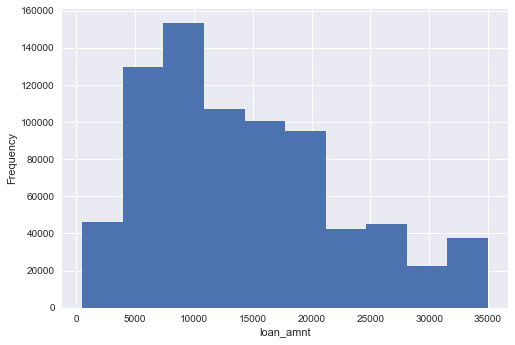

annual_inc


(array([7.78706e+05, 1.64000e+02, 1.80000e+01, 4.00000e+00, 5.00000e+00,
        6.00000e+00, 4.00000e+00, 2.00000e+00, 4.00000e+00, 5.00000e+00]),
 array([      0.,  890006., 1780012., 2670018., 3560024., 4450030.,
        5340036., 6230042., 7120048., 8010054., 8900060.]),
 <a list of 10 Patch objects>)

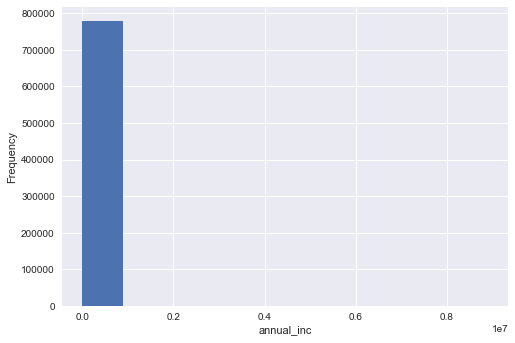

dti


(array([7.78904e+05, 1.10000e+01, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([  0.   ,  67.252, 134.504, 201.756, 269.008, 336.26 , 403.512,
        470.764, 538.016, 605.268, 672.52 ]),
 <a list of 10 Patch objects>)

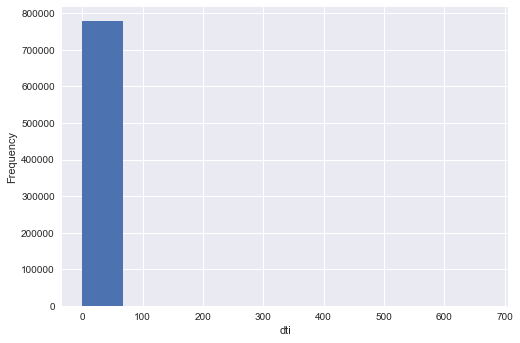

delinq_2yrs


(array([7.69024e+05, 8.76300e+03, 8.84000e+02, 1.91000e+02, 4.20000e+01,
        7.00000e+00, 4.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  3.9,  7.8, 11.7, 15.6, 19.5, 23.4, 27.3, 31.2, 35.1, 39. ]),
 <a list of 10 Patch objects>)

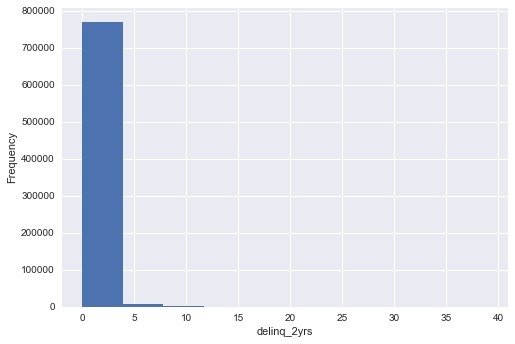

inq_last_6mths


(array([7.63458e+05, 1.49980e+04, 3.67000e+02, 6.00000e+01, 1.80000e+01,
        8.00000e+00, 1.00000e+00, 3.00000e+00, 2.00000e+00, 3.00000e+00]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <a list of 10 Patch objects>)

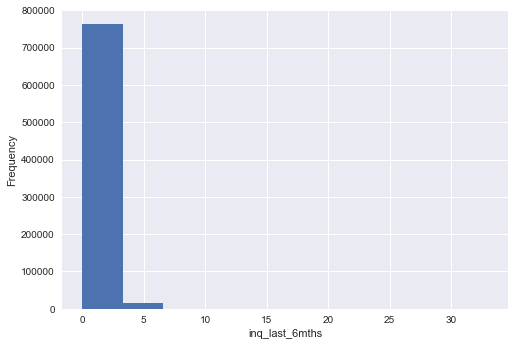

mths_since_last_delinq


(array([5.14762e+05, 1.10195e+05, 8.04090e+04, 5.82560e+04, 1.50560e+04,
        1.57000e+02, 4.70000e+01, 2.30000e+01, 7.00000e+00, 6.00000e+00]),
 array([  0. ,  18.8,  37.6,  56.4,  75.2,  94. , 112.8, 131.6, 150.4,
        169.2, 188. ]),
 <a list of 10 Patch objects>)

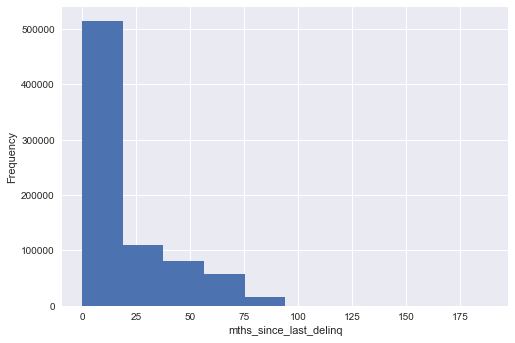

mths_since_last_record


(array([660515.,   4463.,   8642.,  14137.,  20564.,  21018.,  16245.,
         13707.,  16007.,   3620.]),
 array([  0. ,  12.9,  25.8,  38.7,  51.6,  64.5,  77.4,  90.3, 103.2,
        116.1, 129. ]),
 <a list of 10 Patch objects>)

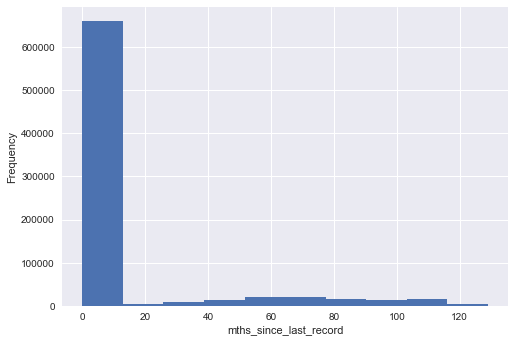

open_acc


(array([2.46099e+05, 4.38679e+05, 8.30150e+04, 9.63700e+03, 1.26300e+03,
        1.84000e+02, 2.70000e+01, 6.00000e+00, 5.00000e+00, 3.00000e+00]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <a list of 10 Patch objects>)

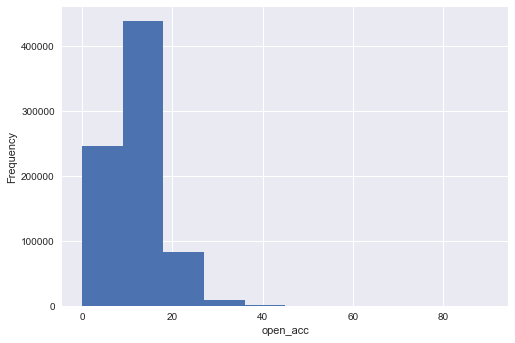

pub_rec


(array([7.78778e+05, 1.23000e+02, 1.00000e+01, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0. ,  8.6, 17.2, 25.8, 34.4, 43. , 51.6, 60.2, 68.8, 77.4, 86. ]),
 <a list of 10 Patch objects>)

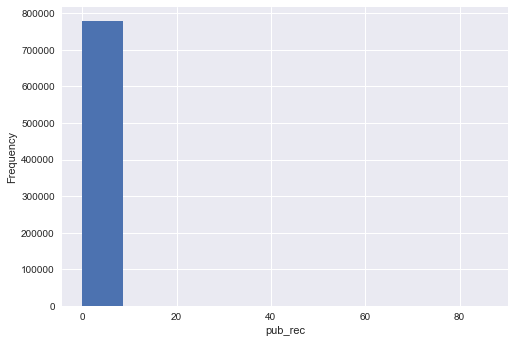

revol_bal


(array([7.78387e+05, 4.72000e+02, 4.30000e+01, 8.00000e+00, 3.00000e+00,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([      0. ,  290483.6,  580967.2,  871450.8, 1161934.4, 1452418. ,
        1742901.6, 2033385.2, 2323868.8, 2614352.4, 2904836. ]),
 <a list of 10 Patch objects>)

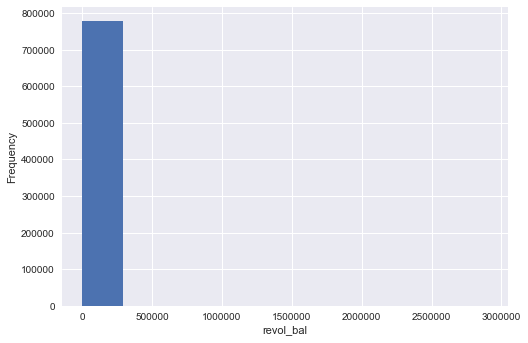

revol_util


(array([7.21169e+05, 5.77430e+04, 4.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.    , 0.8923, 1.7846, 2.6769, 3.5692, 4.4615, 5.3538, 6.2461,
        7.1384, 8.0307, 8.923 ]),
 <a list of 10 Patch objects>)

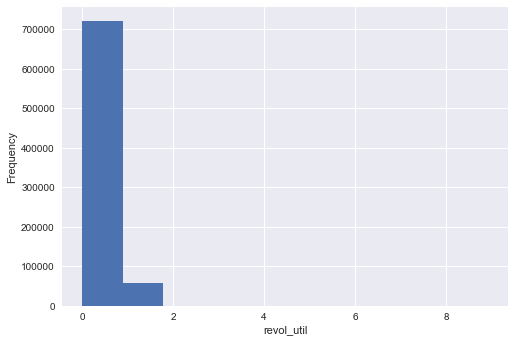

total_acc


(array([1.93098e+05, 4.15946e+05, 1.43712e+05, 2.37720e+04, 2.01600e+03,
        3.09000e+02, 4.60000e+01, 1.00000e+01, 6.00000e+00, 3.00000e+00]),
 array([  0. ,  16.9,  33.8,  50.7,  67.6,  84.5, 101.4, 118.3, 135.2,
        152.1, 169. ]),
 <a list of 10 Patch objects>)

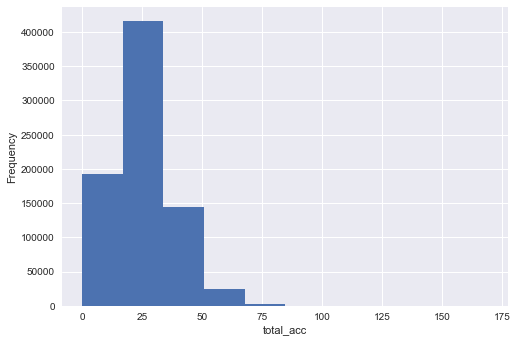

pub_rec_bankruptcies


(array([7.7373e+05, 4.0540e+03, 8.1900e+02, 2.0100e+02, 7.2000e+01,
        3.5000e+01, 4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

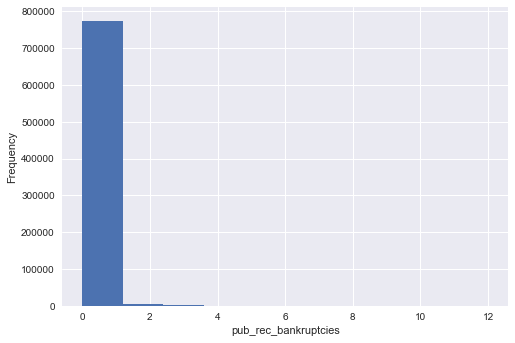

n_term


(array([589353.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 189565.]),
 array([36. , 38.4, 40.8, 43.2, 45.6, 48. , 50.4, 52.8, 55.2, 57.6, 60. ]),
 <a list of 10 Patch objects>)

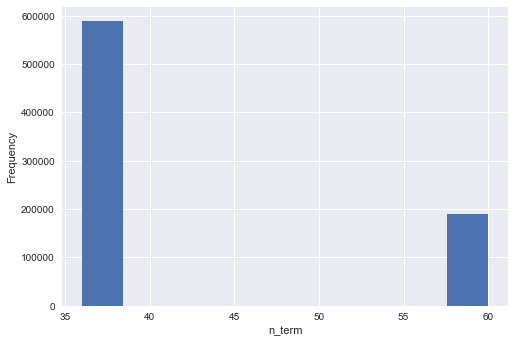

In [21]:
for col in numeric_col_names:
    print(col)
    plt.hist(df[col], bins = 10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<font face="verdana"> 
  
  ### Observations and next steps:
  
  All of the attributes are non-linear. We should consider log transformation or higer order terms.
  
  # TODO : Log transform all numeric fields and replot KDE


<br>
<br>
For each of the categorical variables, let us identify unique values
<br>
<br>

###  Correlation Matrix

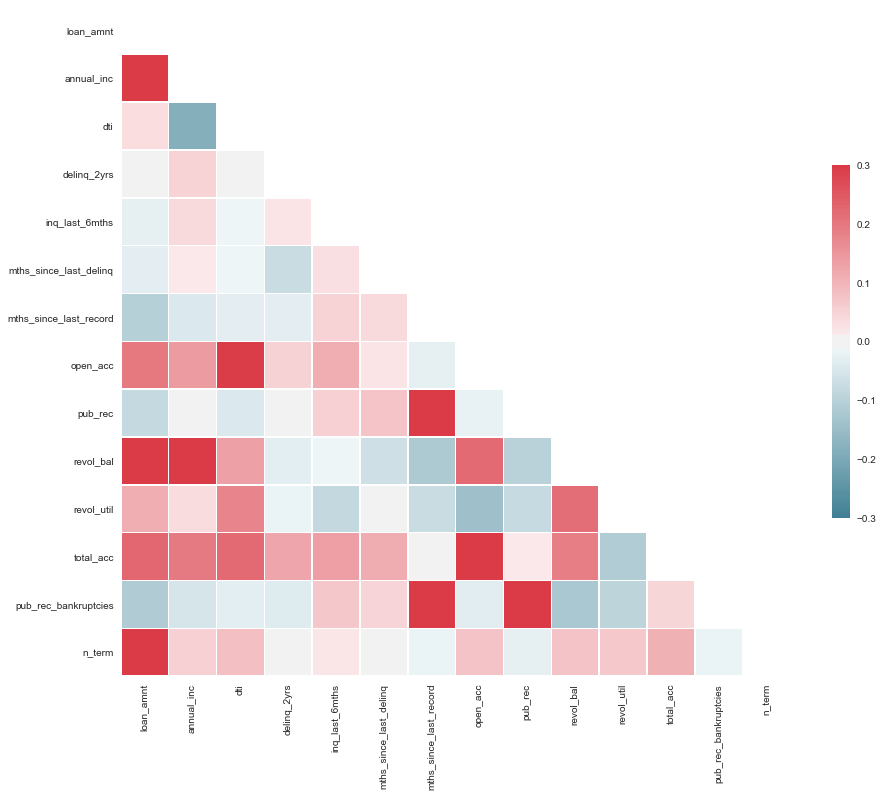

In [36]:
# Compute the correlation matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<font face="verdana"> 
    <br>
    <br>
    Cells in red are highly correlated columns. We can drop columns which are highly correlated with loan_amt, like number of terms, revol_bal, annual_inc.
    
    
### Scatter plots for all features

C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001729C17A8D0>,
      dtype=object)

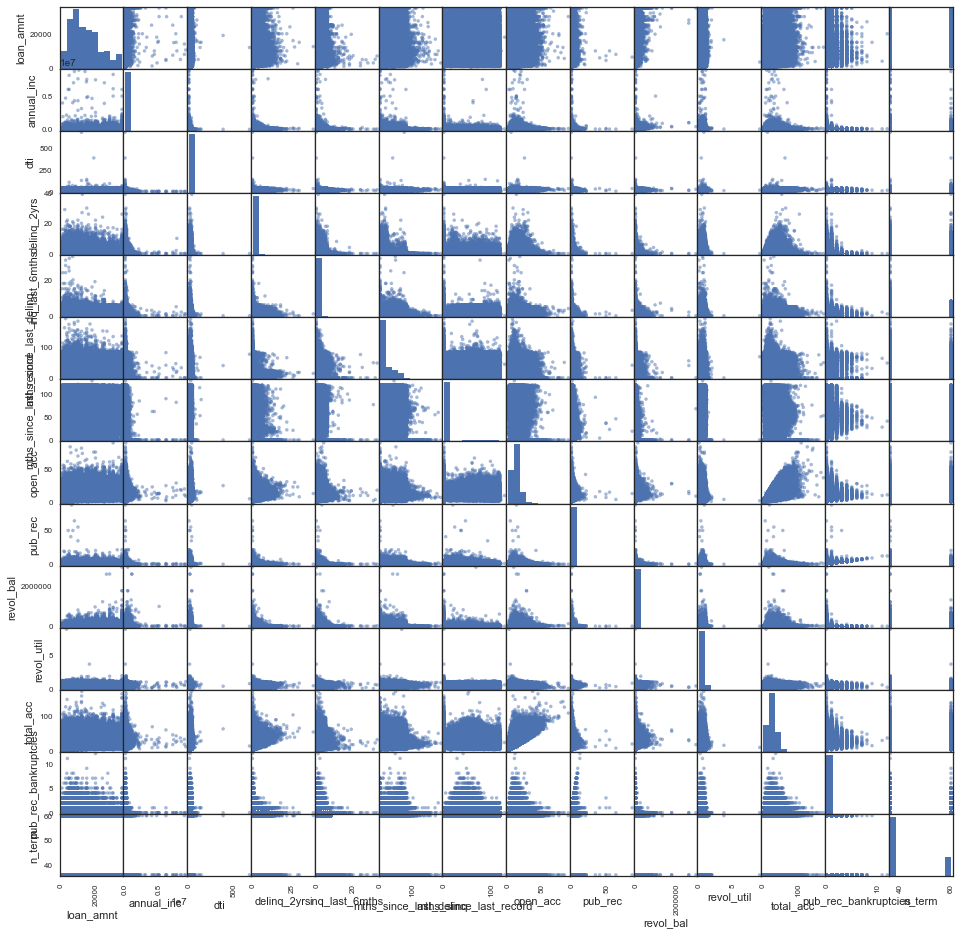

In [37]:
pd.scatter_matrix(df, figsize=(16, 16))
plt.show()

<font face="verdana"> 
    
  ## TODO observations on correlation map and scatter plots.
    
### correlation coefficients

In [33]:
corr

,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,n_term
loan_amnt,1.000000,0.341940,0.033684,-0.001883,-0.023671,-0.028368,-0.103312,0.197469,-0.081991,0.327933,0.110824,0.225209,-0.114201,0.388783
annual_inc,0.341940,1.000000,-0.180902,0.049236,0.038641,0.015257,-0.043970,0.142147,-0.009772,0.302325,0.035412,0.194532,-0.053858,0.054492
dti,0.033684,-0.180902,1.000000,-0.006901,-0.012743,-0.012480,-0.030291,0.296198,-0.042576,0.133249,0.178511,0.222822,-0.031203,0.083813
delinq_2yrs,-0.001883,0.049236,-0.006901,1.000000,0.022105,-0.072995,-0.030228,0.052073,-0.010400,-0.032124,-0.017952,0.123774,-0.036255,-0.007161
inq_last_6mths,-0.023671,0.038641,-0.012743,0.022105,1.000000,0.031500,0.051263,0.112456,0.055263,-0.013911,-0.084100,0.135768,0.069654,0.020877
mths_since_last_delinq,-0.028368,0.015257,-0.012480,-0.072995,0.031500,1.000000,0.038606,0.021463,0.073774,-0.064441,-0.007937,0.113468,0.048891,-0.003686
mths_since_last_record,-0.103312,-0.043970,-0.030291,-0.030228,0.051263,0.038606,1.000000,-0.025423,0.669451,-0.119384,-0.074800,-0.001058,0.785909,-0.016530
open_acc,0.197469,0.142147,0.296198,0.052073,0.112456,0.021463,-0.025423,1.000000,-0.023400,0.221348,-0.142244,0.691110,-0.032884,0.076301
pub_rec,-0.081991,-0.009772,-0.042576,-0.010400,0.055263,0.073774,0.669451,-0.023400,1.000000,-0.100216,-0.078750,0.015953,0.653939,-0.024796
revol_bal,0.327933,0.302325,0.133249,-0.032124,-0.013911,-0.064441,-0.119384,0.221348,-0.100216,1.000000,0.213427,0.189449,-0.124200,0.075382


<font face="verdana"> 
    
### Analysis of categorical variables

In [21]:
df.select_dtypes(include=['object']).columns

Index(['term', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'addr_state'],
      dtype='object')

In [24]:
categorical_cols = df.select_dtypes(include=['object']).columns
#categorical_cols = categorical_cols.drop(['issue_d','earliest_cr_line','revol_util'])

<font face="verdana"> 
    
#### The following are the categorical variables in our dataset. For each of these categories, we will plot number records by its unique category

In [25]:
for col in categorical_cols:
    print("Unique values for the column ",col)
    df[col].unique()

Unique values for the column  term


array(['60 months', '36 months'], dtype=object)

Unique values for the column  emp_length


array(['Less than 1 year', '4 years', '3 years', '10+ years', '1 year',
       '9 years', '2 years', '8 years', '7 years', '5 years', '0 years',
       '6 years'], dtype=object)

Unique values for the column  home_ownership


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

Unique values for the column  verification_status


array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

Unique values for the column  loan_status


array(['Charged Off', 'Fully Paid'], dtype=object)

Unique values for the column  purpose


array(['car', 'small_business', 'other', 'debt_consolidation',
       'major_purchase', 'credit_card', 'home_improvement', 'moving',
       'vacation', 'house', 'medical', 'wedding', 'renewable_energy',
       'educational'], dtype=object)

Unique values for the column  addr_state


array(['GA', 'CA', 'TX', 'VA', 'FL', 'NY', 'PA', 'OH', 'IL', 'WA', 'MN',
       'AK', 'OR', 'AZ', 'WI', 'NC', 'CO', 'MO', 'WV', 'NV', 'SC', 'RI',
       'MA', 'KY', 'HI', 'NJ', 'MT', 'MI', 'SD', 'DC', 'OK', 'VT', 'NM',
       'MD', 'AL', 'KS', 'UT', 'LA', 'AR', 'CT', 'NH', 'DE', 'WY', 'MS',
       'TN', 'ID', 'NE', 'IA', 'IN', 'ND', 'ME'], dtype=object)

<font face="verdana"> 
  
  ### Observations and next steps:
<br>Categorical columns look clean. We will proceed to plot each categorical variables.

For each categorical variable, sliced by output variable <b>loan status</b>, we will plot count of records.

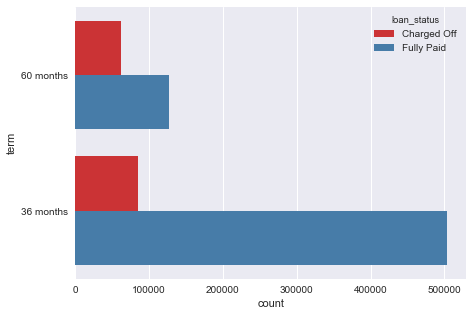

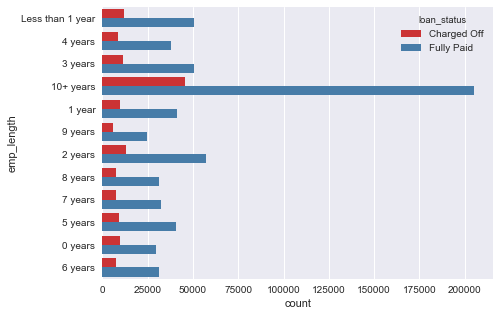

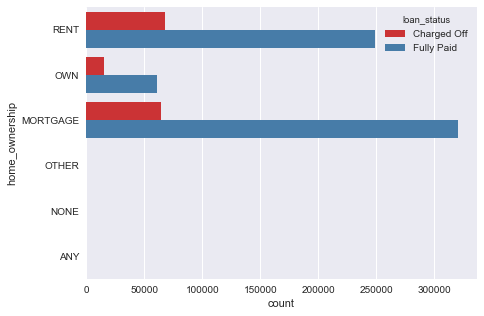

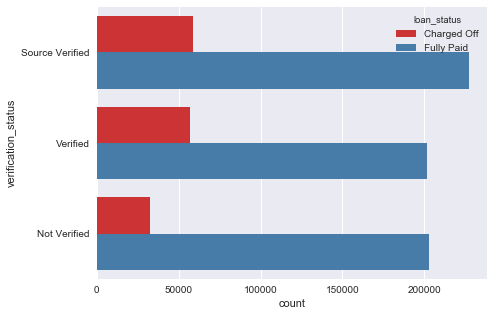

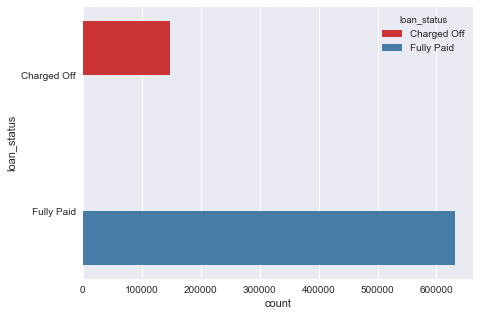

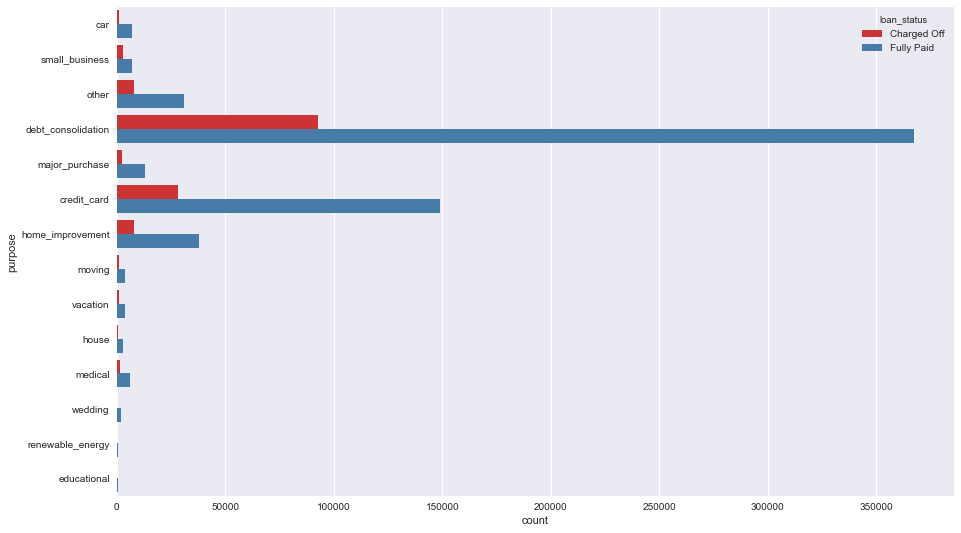

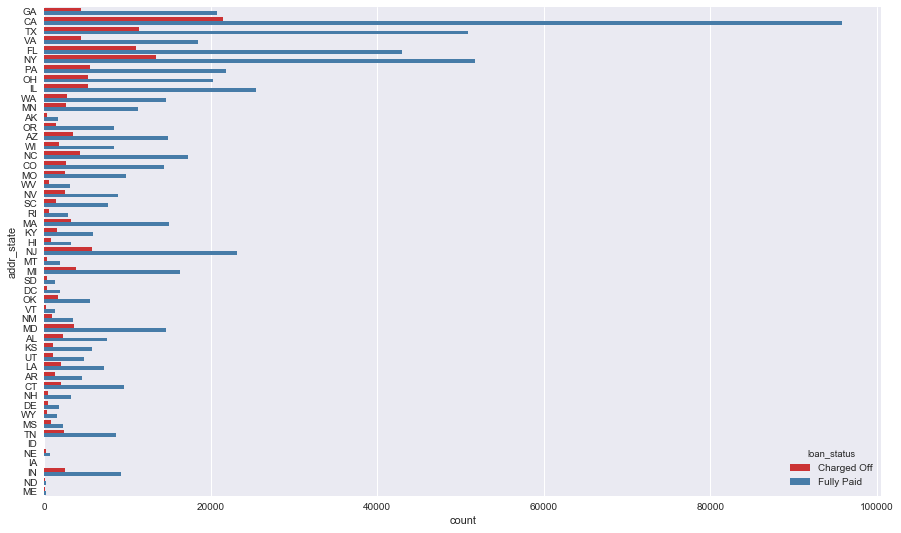

In [28]:
for col in categorical_cols:
    if col == 'addr_state' or col == 'purpose':
        sns.set(rc={'figure.figsize':(15,10.2)})
    else:
        sns.set(rc={'figure.figsize':(7,5)})
    sns.countplot(y=col,data=df,palette='Set1',hue="loan_status")
    plt.show()

<font face="verdana"> 
    
#### Observations: 
<br> 1. Data for charged off is much less than fully paid.
<br> 2. Most purpose of the loan is for debt consolidation or credit card, while wedding, renewable energy and education are least reasons to get take loan.
<br> 3. Number of loans in California is hightest, almost twice the next highest Florida.
<br> 4. There are fewer home owners to take a loan than those on Rent or having home loan.

<font face="verdana"> 

### Loan amount - In-depth analysis

Let us look at how loan amount is impacting other variables

#### Understanding violin plots:
1. At the stomach of the violin is the box plot that gives median value for that category.
2. The spread is the kernal density distribution, number of data values in that range. a peak can be understood as high concentration of data and narrow representa low number of data. 
3. overall violin gives the range of data in that category.


C:\Users\Preeti\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


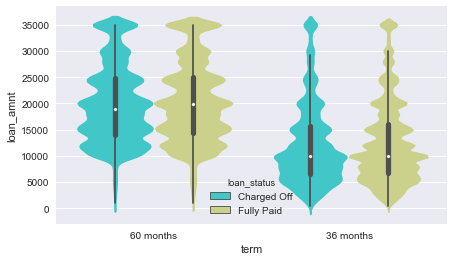

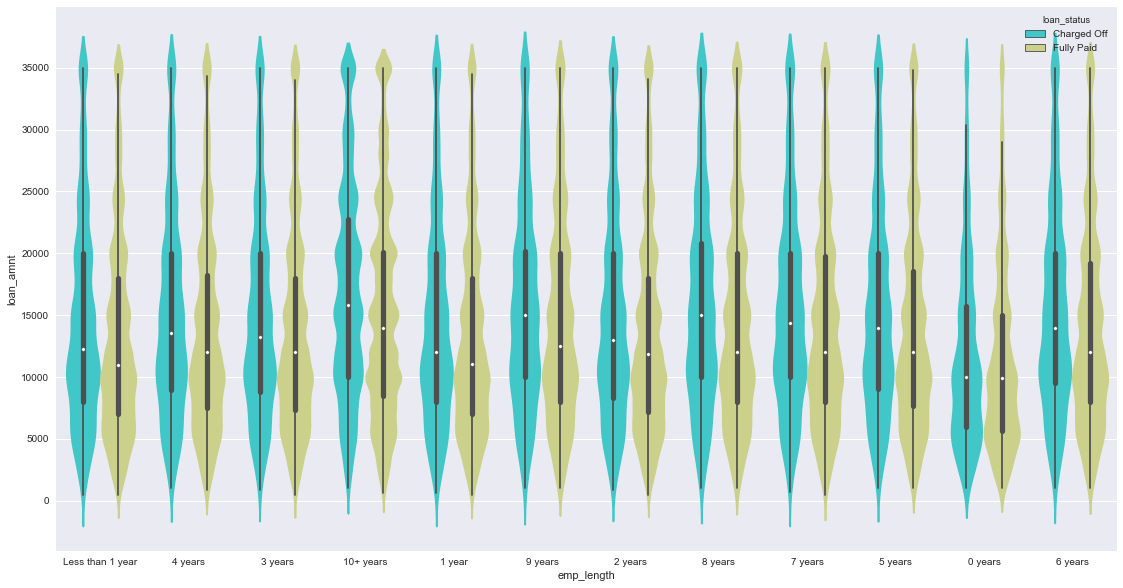

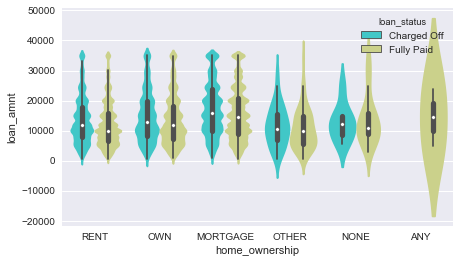

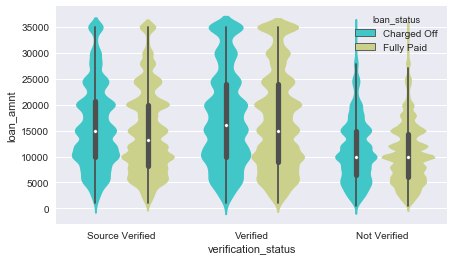

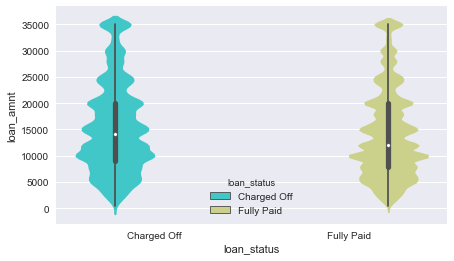

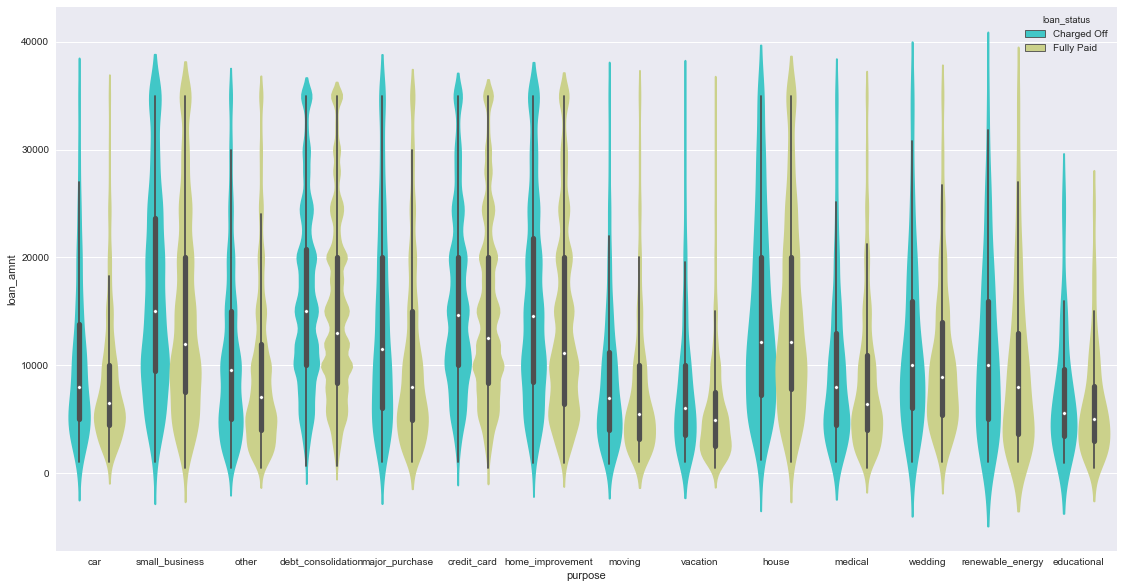

In [31]:
sns.set_style('whitegrid')
for col in categorical_cols:
    if col != 'addr_state': 
        if col == 'purpose'  or col == 'emp_length':
            sns.set(rc={'figure.figsize':(19,10)})
        else:
            sns.set(rc={'figure.figsize':(7,4)})
        sns.violinplot(x=col, y="loan_amnt", data=df,palette='rainbow',hue="loan_status")
        plt.show()

<font face="verdana"> 
    
#### Observations: TODO

In [ ]:
for col in categorical_cols:
    if col == 'addr_state' or col == 'purpose'  or col == 'emp_length':
        sns.set(rc={'figure.figsize':(15,8.27)})
    else:
        sns.set(rc={'figure.figsize':(5,4)})
    sns.swarmplot(x=col, y="loan_amnt", data=df,hue='loan_status',palette='Set1')
    plt.show()

In [88]:
df.head()

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,n_term
0,2500,60 months,Less than 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,5.0,0.0,3.0,0.0,1687,0.094,4.0,0.0,60
1,5600,60 months,4 years,OWN,40000.0,Source Verified,Charged Off,small_business,CA,5.55,0.0,2.0,0.0,11.0,0.0,5210,0.326,13.0,0.0,60
2,5375,60 months,Less than 1 year,RENT,15000.0,Verified,Charged Off,other,TX,18.08,0.0,0.0,0.0,2.0,0.0,9279,0.365,3.0,0.0,60
3,9000,36 months,Less than 1 year,RENT,30000.0,Source Verified,Charged Off,debt_consolidation,VA,10.08,0.0,1.0,0.0,4.0,0.0,10452,0.917,9.0,0.0,36
4,10000,36 months,3 years,RENT,100000.0,Source Verified,Charged Off,other,CA,7.06,0.0,2.0,0.0,14.0,0.0,11997,0.555,29.0,0.0,36


In [90]:
df.to_csv('master_clean_data.csv', index = False)